In [1]:
import numpy as np
import json
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
import os

In [3]:
def plot_roc(results, classifier_name, label):
    plt.gcf().set_size_inches((8,8))
    y_test = []
    y_score = []
    for result in results['roc'][classifier_name]:
        y_test.append(np.array(result['y_test']))
        y_score_tmp = np.array(result['y_score'])
        if y_score_tmp.shape[-1] == 1:
            y_score_tmp = y_score_tmp[...,0]
        y_score.append(y_score_tmp)
    y_test, y_score = map(np.array, (y_test, y_score))
    fpr, tpr, _ = roc_curve(y_test.ravel(), y_score.ravel())
    auc = roc_auc_score(y_test.ravel(), y_score.ravel(), average='weighted')
    plt.plot(fpr, tpr, label='{} {}: area under curve {:.4}'.format(classifier_name, label, auc))
    return fpr, tpr, auc

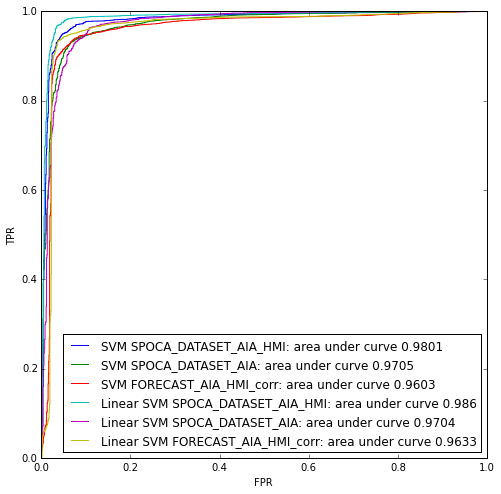

In [5]:
results = {}
for base in ['FORECAST_AIA_HMI_corr', 'SPOCA_DATASET_AIA', 'SPOCA_DATASET_AIA_HMI']:
    with open('results/{}_results.json'.format(base)) as f:
        results[base] = json.load(f)
for classifier_name in ['SVM', 'Linear SVM']:
    for base in results.keys():
        fpr, tpr, auc = plot_roc(results[base], classifier_name, base)
        pd.DataFrame({'fpr': fpr, 'tpr': tpr}).to_csv('results/roc_{}_{}.csv'.format(classifier_name.replace(' ', '_'), base))
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.savefig('results/roc_plot.pdf')
    